***Carga de las bibliotecas***

In [16]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
warnings.filterwarnings('ignore')

***Carga del dataset***

In [17]:
df = pd.read_csv('/content/drive/MyDrive/ESCOM/8vo Semestre/Data Mining/Extraordinario/basket_analysis.csv')
df.drop(df.columns[0],axis=1,inplace=True)

***Análisis del dataset***

In [18]:
df.shape

(999, 16)

Tenemos 999 canastas para calcular la recomendación de cada artículo que se vende en la tienda. Hay 16 artículos vendidos en la tienda.

In [19]:
df.mean()

Apple           0.383383
Bread           0.384384
Butter          0.420420
Cheese          0.404404
Corn            0.407407
Dill            0.398398
Eggs            0.384384
Ice cream       0.410410
Kidney Beans    0.408408
Milk            0.405405
Nutmeg          0.401401
Onion           0.403403
Sugar           0.409409
Unicorn         0.389389
Yogurt          0.420420
chocolate       0.421421
dtype: float64

La transacción de venta o el recuento de cada artículo único aproximadamente para esta muestra. Nos sumergiremos y veremos si hay alguna diferencia o correlación entre las canastas. Dado que el marco de datos ya está tabulado como un marco de datos activo, de inmediato usaremos el conjunto de datos que se analizará con apriori.

***Algoritmo APRIORI***

Breve introducción a los antecedentes del algoritmo Apriori. El algoritmo asume que cualquier subconjunto de un conjunto de elementos frecuentes debe ser frecuente. Digamos que en nuestros casos, donde {manzana, unicornio, yogur} es frecuente, entonces {manzana, yogur} es frecuente. Mientras que {manzana, unicornio} no es frecuente, entonces {manzana, unicornio, yogur} no es frecuente.

*  APOYO = Una forma simple de controlar la complejidad es imponer una restricción que dichas reglas deben aplicar a un porcentaje mínimo de los datos.
CONFIANZA = La probabilidad de que B ocurra cuando A; es p (B | A), que en asociación minera.
*   LIFT = la co-ocurrencia de A y B es la probabilidad de que realmente veamos los dos juntos, en comparación con la probabilidad de que los veamos juntos si no estuvieran relacionados (independientes) entre sí.
*   APALANCAMIENTO = alternativa es mirar la diferencia entre estas cantidades en lugar de su relación.
*   CONVICCIÓN = medida para determinar la dirección de la regla. A diferencia de la elevación, la convicción es sensible a la dirección de la regla.

Solo el apoyo y la confianza como parámetro pueden ser engañosos para los artículos que son demasiado comunes / populares en la canasta. Es más probable que los artículos populares formen parte de la misma canasta solo porque son populares en lugar de cualquier otra cosa.

Establecemos el soporte mínimo en 0.06, el número máximo que se analiza en la canasta es 3. Estamos haciendo la primera poda y vemos qué obtenemos del resultado

***Calculo de conjuntos de elementos frecuentes utilizando el algoritmo Apriori***

In [20]:
frequent_itemsets = apriori(df,
                            min_support = .006,
                            max_len = 3,
                            use_colnames = True)

***Calculo de todas las reglas de asociación para frecuent_itemsets***

In [21]:
rules = association_rules(frequent_itemsets,
                            metric = 'support',
                            min_threshold=0.1)

In [22]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.2) &
                        (rules['lift'] > 1.0)]

In [23]:
filtered_rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
402,"(Unicorn, Dill)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764
390,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446
326,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968
392,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051
258,"(Ice cream, Kidney Beans)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902
...,...,...,...,...,...,...,...,...,...
323,(Butter),"(Nutmeg, Yogurt)",0.420420,0.192192,0.100100,0.238095,1.238839,0.019299,1.060248
287,(Butter),"(Unicorn, Ice cream)",0.420420,0.185185,0.100100,0.238095,1.285714,0.022244,1.069444
371,(Yogurt),"(Corn, Kidney Beans)",0.420420,0.195195,0.100100,0.238095,1.219780,0.018036,1.056306
321,(Yogurt),"(Nutmeg, Butter)",0.420420,0.198198,0.100100,0.238095,1.201299,0.016774,1.052365


***Generar confianza en gráficos de dispersión frente a soporte***

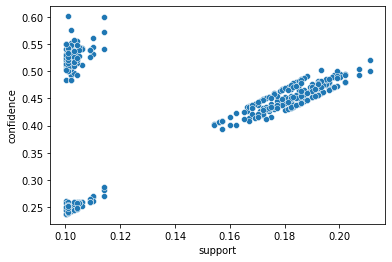

In [24]:
sns.scatterplot(x = "support", y = "confidence", data = filtered_rules)
plt.show()

Con el diagrama de dispersión, podemos echar un vistazo rápido, dónde debería estar el límite y qué métrica debería establecerse para filtrar los conjuntos de elementos frecuentes.

In [25]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)]

***Generar confianza en gráficos de dispersión frente a soporte***

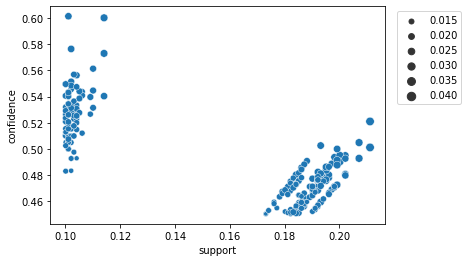

In [26]:
sns.scatterplot(x = "support", y = "confidence", size= 'leverage',data = filtered_rules)
plt.legend(bbox_to_anchor= (1.02, 1), loc='upper left',)
plt.show()

***Agregar texto en negrita otra regla adicional donde admita más de 0.2 para un conjunto de elementos dado***

In [27]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)&
                        (rules['support']>0.195)]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579
67,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571
68,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905
69,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,0.030499,1.139764
70,(Milk),(Butter),0.405405,0.420420,0.198198,0.488889,1.162857,0.027757,1.133960
71,(Butter),(Milk),0.420420,0.405405,0.198198,0.471429,1.162857,0.027757,1.124909
72,(Nutmeg),(Butter),0.401401,0.420420,0.198198,0.493766,1.174457,0.029441,1.144884
73,(Butter),(Nutmeg),0.420420,0.401401,0.198198,0.471429,1.174457,0.029441,1.132484
74,(Onion),(Butter),0.403403,0.420420,0.197197,0.488834,1.162726,0.027598,1.133838
75,(Butter),(Onion),0.420420,0.403403,0.197197,0.469048,1.162726,0.027598,1.123635


In [28]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

***Convertir reglas en coordenadas adecuadas para su uso en una gráfica de coordenadas paralelas***

In [29]:
coords = rules_to_coordinates(filtered_rules)

***Generar gráfico de coordenadas paralelas***

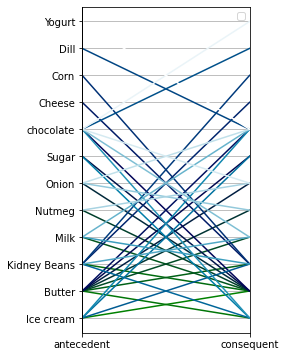

In [30]:
plt.figure(figsize=(3,6))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

Desde el gráfico parece que la mantequilla se puede usar como venta cruzada con otros productos, también actúa como algo a ofrecer con antecedentes que es bajo. Así, es más probable que los clientes las compren si la mantequilla se les ofrece a un precio más económico si compran los antecedentes que se vendieron menos en una tienda.